In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire_b
import prepare_b

#new imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [5]:
df = acquire_b.get_titanic_data()

In [6]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [7]:
train, validate, test = prepare_b.prep_titanic_data(df)

In [8]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [9]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [10]:
train.survived.head()

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [11]:
baseline_accuracy = (train.survived == 0).mean()
baseline_accuracy

0.6164658634538153

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [12]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [13]:
pd.concat([train.iloc[:,1:3], train.iloc[:,5:]], axis=1)

,pclass,age,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,40.1250,1,1,0,0
165,3,9.000000,20.5250,0,1,0,1
50,3,7.000000,39.6875,0,1,0,1
259,2,50.000000,26.0000,0,0,0,1
306,1,29.678105,110.8833,1,0,0,0
...,...,...,...,...,...,...,...
313,3,28.000000,7.8958,1,1,0,1
636,3,32.000000,7.9250,1,1,0,1
222,3,51.000000,8.0500,1,1,0,1
485,3,29.678105,25.4667,0,0,0,1


In [14]:
X_train = train.drop(columns=['survived'])
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


In [15]:
X_validate = validate.drop(columns=['survived'])
X_test = test.drop(columns=['survived'])

In [16]:
y_train = train.survived
y_train.head()

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [17]:
y_validate = validate.survived
y_test = test.survived

In [18]:
# Let's generate a blank, new Decision Tree model
# Be sure to set the max_depth argument
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [19]:
# Now let's train our model on the training data
clf = clf.fit(X_train, y_train)

In [20]:
clf.predict(X_train)[:5]

array([0, 0, 0, 1, 1])

In [21]:
clf.score(X_train, y_train)

0.8253012048192772

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [22]:
clf.score(X_train, y_train)

0.8253012048192772

In [23]:
y_pred = clf.predict(X_train)

In [24]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[277,  30],
       [ 57, 134]])

In [25]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [26]:
pd.DataFrame(conf)

,0,1
0,277,30
1,57,134


In [27]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [29]:
conf

array([[277,  30],
       [ 57, 134]])

In [30]:
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,277,30
1_actual,57,134


positive case = survive

In [31]:
conf.ravel()

array([277,  30,  57, 134])

In [32]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(277, 30, 57, 134)

In [33]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [34]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8253012048192772

True Positive Rate/Sensitivity/Recall/Power: 0.7015706806282722
False Positive Rate/False Alarm Ratio/Fall-out: 0.09771986970684039
True Negative Rate/Specificity/Selectivity: 0.9022801302931596
False Negative Rate/Miss Rate: 0.29842931937172773

Precision/PPV: 0.8170731707317073
F1 Score: 0.7549295774647887

Support (0): 191
Support (1): 307


5. Run through steps 2-4 using a different max_depth value.

In [35]:
#for one
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.7991967871485943

In [36]:
#for lots
for x in range(1,20):
#     print(x)
    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    acc = clf.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.8
for depth of  2, the accuracy is 0.8
for depth of  3, the accuracy is 0.83
for depth of  4, the accuracy is 0.84
for depth of  5, the accuracy is 0.85
for depth of  6, the accuracy is 0.87
for depth of  7, the accuracy is 0.89
for depth of  8, the accuracy is 0.9
for depth of  9, the accuracy is 0.92
for depth of 10, the accuracy is 0.94
for depth of 11, the accuracy is 0.96
for depth of 12, the accuracy is 0.97
for depth of 13, the accuracy is 0.99
for depth of 14, the accuracy is 0.99
for depth of 15, the accuracy is 1.0
for depth of 16, the accuracy is 1.0
for depth of 17, the accuracy is 1.0
for depth of 18, the accuracy is 1.0
for depth of 19, the accuracy is 1.0


6. Which model performs better on your in-sample data?

In [ ]:
# my models with a max depth of 8 or greater perform the best! with in-sample data

7. Which model performs best on your out-of-sample data, the validate set?

In [37]:
scores_all = []

for x in range(1,20):

    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = clf.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])

In [38]:
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.head()

,max_depth,train_acc,val_acc
0,1,0.799197,0.761682
1,2,0.799197,0.761682
2,3,0.825301,0.799065
3,4,0.835341,0.794393
4,5,0.853414,0.799065


In [39]:
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc

In [40]:
scores_df.sort_values('diff')

,max_depth,train_acc,val_acc,diff
2,3,0.825301,0.799065,0.026236
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
3,4,0.835341,0.794393,0.040949
4,5,0.853414,0.799065,0.054348
5,6,0.865462,0.785047,0.080415
6,7,0.885542,0.780374,0.105168
7,8,0.897590,0.789720,0.107871
8,9,0.921687,0.803738,0.117948
9,10,0.941767,0.789720,0.152047


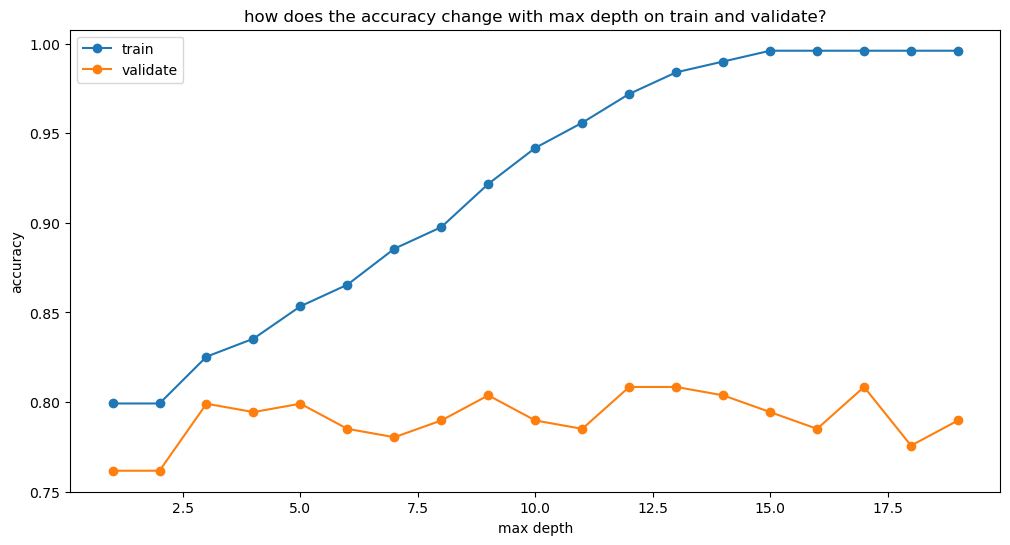

In [41]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

In [42]:
X_train.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')